<a href="https://colab.research.google.com/github/oluwapelumi1/ACCESS-SAP-DATA-Science-Track/blob/main/Week_3_Session_5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WEEK 3 SESSION 5 - ASSIGNMENT**
Following what we have done today, perform Exploratory Data Analysis on your dataset -

Exploratory Data Analysis on your dataset-https://www.kaggle.com/datasets/mohammedarfathr/budgetwise-personal-finance-dataset

Study your dataset and perform:

**1.Data overview and inspection**

**2.Univariate analysis**

**3.Bivariate analysis**

**4.Correlation**

**5.Outlier detection in numeric column(s)**

 **6.Answer three business questions developed by you.**

In [97]:

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#getting the dataset
from google.colab import files, drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Warehouse_and_Retail_Sales.csv')
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [99]:
df.tail()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00
307643,2020,9,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.00
307644,2020,9,NaN,WC,WINE CREDIT,REF,0.00,0.0,-70.00


In [100]:
#summary of data (number of rows,columns,Dtype)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [101]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


**Are there values that suggest possible outliers?**
Yes, there are values that strongly suggest possible outliers, particularly in the 'WAREHOUSE SALES' column.

**Which column(s) might contain unusually large values?**
The "Warehouse Sales" column defiitely has unusually large values (over 18,000), compare to the "RETAIL SALES" (2,739).







## **NUMERICAL ANALYSIS**

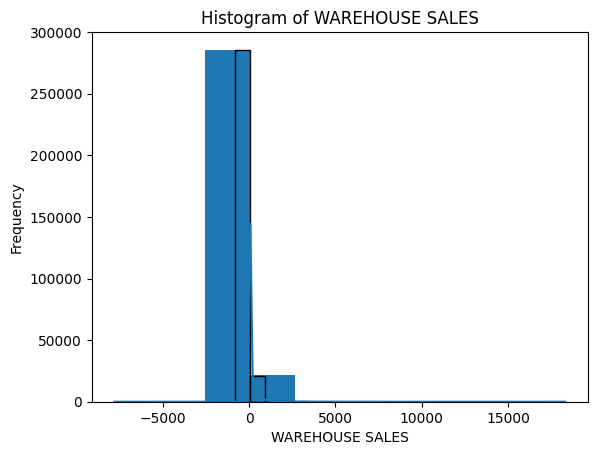

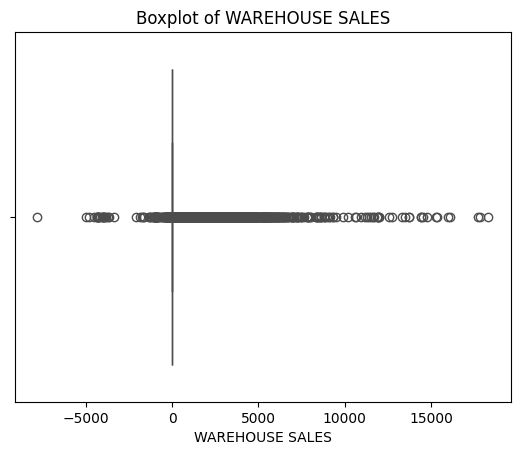

In [102]:
#histogram of the column "WAREHOUSE SALES"
plt.hist(df['WAREHOUSE SALES'])
sns.histplot(df['WAREHOUSE SALES'], bins =30, kde = True)
plt.title('Histogram of WAREHOUSE SALES')
plt.xlabel('WAREHOUSE SALES')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['WAREHOUSE SALES'], color='orange')
plt.title('Boxplot of WAREHOUSE SALES')
plt.show()

## **Categorical Analysis**

In [103]:
df['ITEM TYPE']

,ITEM TYPE
0,WINE
1,WINE
2,BEER
3,WINE
4,WINE
...,...
307640,BEER
307641,BEER
307642,BEER
307643,BEER


/tmp/ipython-input-2590569079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "ITEM TYPE", data = df, palette = "magma")


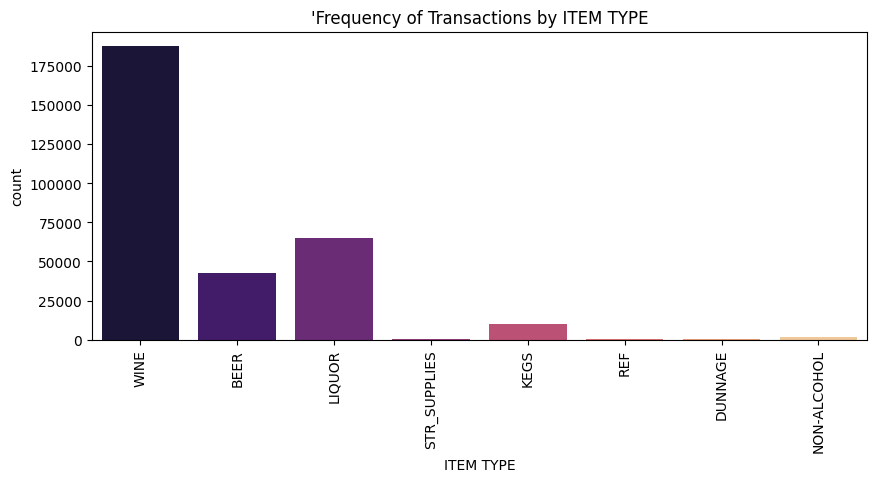

In [104]:

plt.figure(figsize=(10,4))
sns.countplot(x = "ITEM TYPE", data = df, palette = "magma")
plt.title("'Frequency of Transactions by ITEM TYPE")
plt.xlabel("ITEM TYPE")
plt.ylabel("count")
plt.xticks(rotation = 90)
plt.show();

**Which category appears most often?**
Wine as one the ITEM TYPE appears the most often.

**What could this mean for the business?**
this could mean that there is something done about the sales of wine in paticular that is not done in other item type
E.g


*   marteting techniques
*   The kind of wines sold
*   the geographical location of wher this Item are sold(eg wines will sell more in luxury areas)




## **Bivariate Analysis**

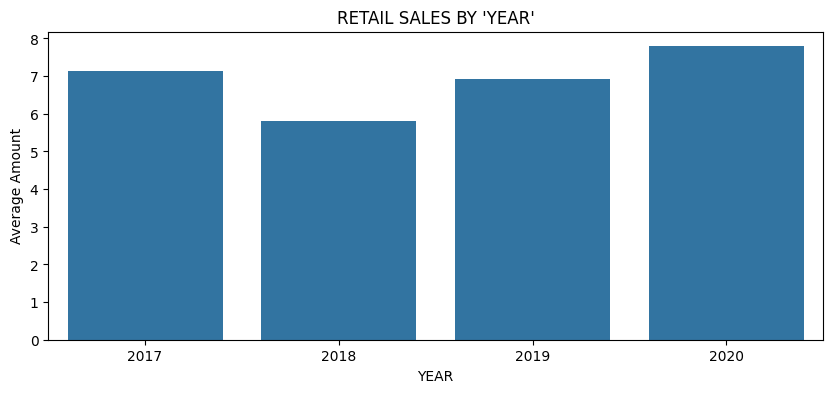

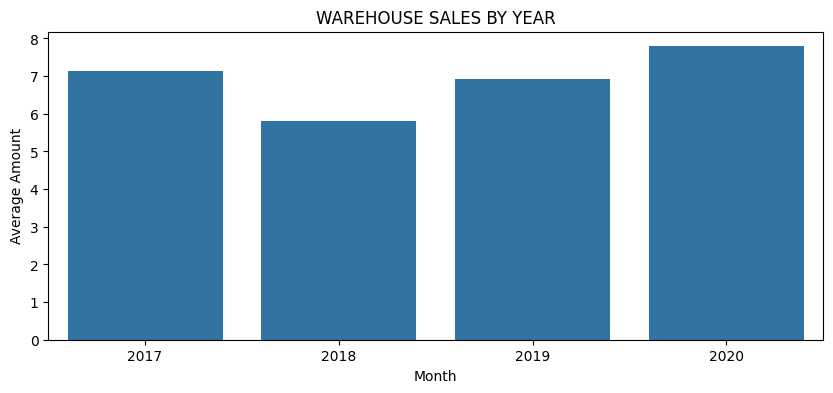

In [105]:

monthly_avg = df.groupby('YEAR')['RETAIL SALES'].mean()
plt.figure(figsize=(10,4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title("RETAIL SALES BY 'YEAR'")
plt.xlabel("YEAR")
plt.ylabel("Average Amount")
plt.show();

cat_amount = df.groupby('SUPPLIER')['MONTH'].mean()
plt.figure(figsize=(10,4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title("WAREHOUSE SALES BY YEAR")
plt.xlabel("Month")
plt.ylabel("Average Amount")
plt.show();



## **OUTLIER DETECTION**

Summary Stats for Warehouse Sales:
count    307645.000000
mean         25.294597
std         249.916798
min       -7800.000000
25%           0.000000
50%           1.000000
75%           5.000000
max       18317.000000
Name: WAREHOUSE SALES, dtype: float64


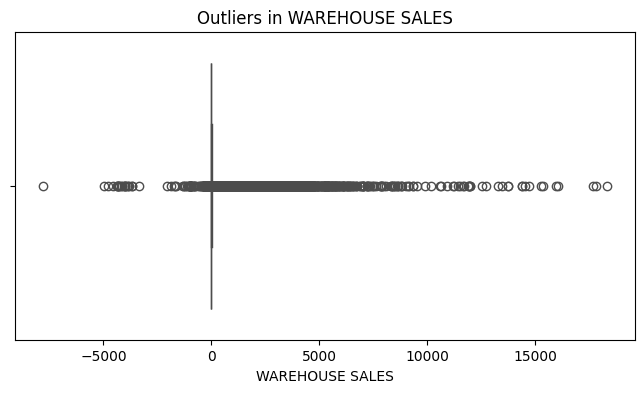

In [106]:
print("Summary Stats for Warehouse Sales:")
print(df['WAREHOUSE SALES'].describe())


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['WAREHOUSE SALES'], color='red')
plt.title('Outliers in WAREHOUSE SALES')
plt.show()

## **Correlation Analysis.**

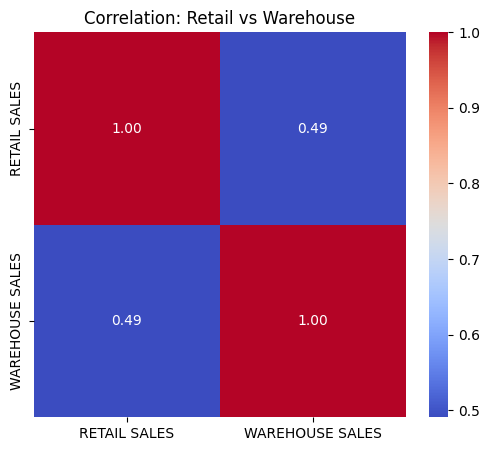

In [107]:
numeric_data = df[['RETAIL SALES', 'WAREHOUSE SALES']]

corr_matrix = numeric_data.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Retail vs Warehouse')
plt.show()

## **Business Questions & Insights**

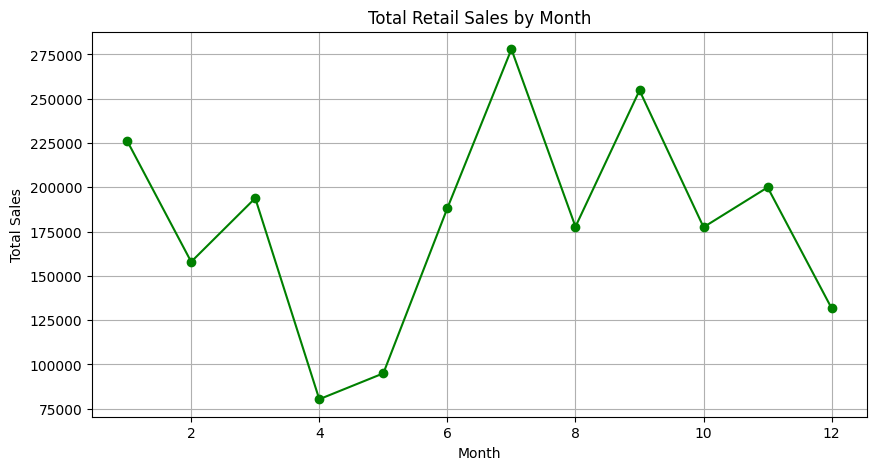

/tmp/ipython-input-3367519649.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='Blues')


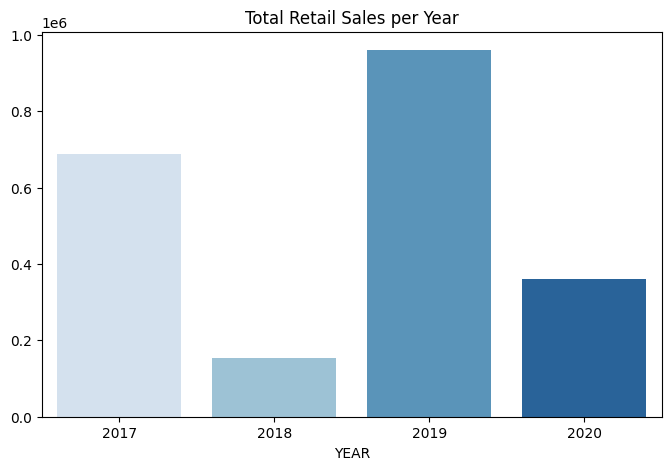

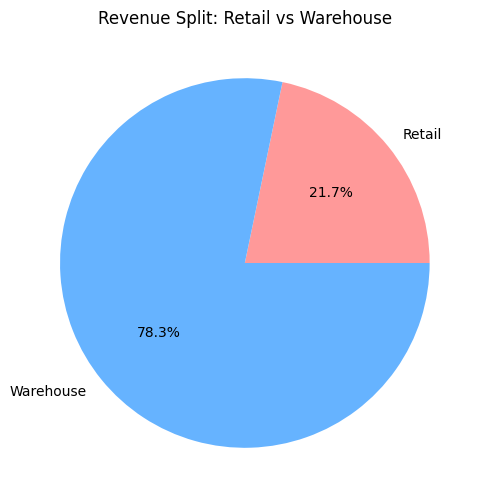

In [108]:
# Q1: Which month has the highest Retail Sales? (Seasonality)
# grouping by month to see when people buy the most
monthly_sales = df.groupby('MONTH')['RETAIL SALES'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Total Retail Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Q2: Are we selling more or less over the years? (Trend)
yearly_sales = df.groupby('YEAR')['RETAIL SALES'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='Blues')
plt.title('Total Retail Sales per Year')
plt.show()

# Q3: Where does most of our money come from? (Retail vs Warehouse)
total_retail = df['RETAIL SALES'].sum()
total_warehouse = df['WAREHOUSE SALES'].sum()

plt.figure(figsize=(6, 6))
plt.pie([total_retail, total_warehouse], labels=['Retail', 'Warehouse'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Revenue Split: Retail vs Warehouse')
plt.show()